# Introduction to `matplotlib`
This notebook provides a basic introduction to plotting with the most popular graphing package in python, [`matplotlib`](https://matplotlib.org), in the context of an example: visualizing the data output from the first CHAP example pipeline.

## Notebook setup
1. Import the modules we will use.
1. Run the [ipython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) to make plots appear nicely in the notebook.
1. Load the output data from the example pipeline to visualize.

In [1]:
# Import modules
import matplotlib.pyplot as plt
import numpy as np

In [64]:
# ipython magic
%matplotlib widget

In [3]:
# Load data
npz_filename = 'output/azimuthally_integrated.npz'
npz_file = np.load(npz_filename)
data = {name: value for name, value in npz_file.items()}
npz_file.close()

## Inspect data

In [4]:
# What arrays were in the npz file?
for k, v in data.items():
    print(f'data["{k}"] is an {type(v).__name__} with shape {v.shape}')

data["radial"] is an ndarray with shape (180,)
data["intensity"] is an ndarray with shape (10, 180)


## 1D Plots

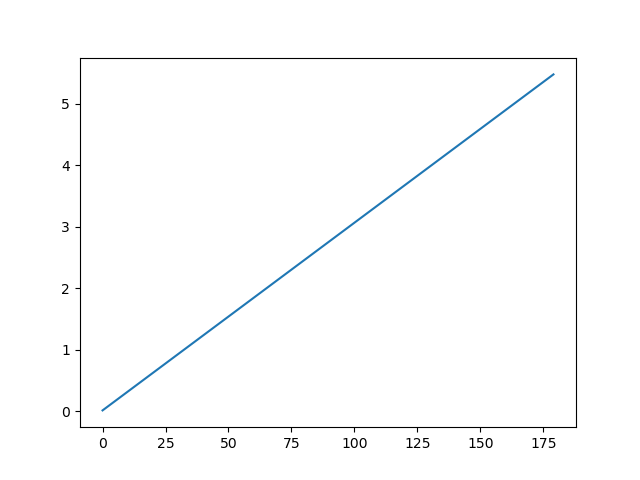

In [65]:
# Plot the radial coordinate values
plt.plot(data['radial'])
plt.show()

In [66]:
plt.close()

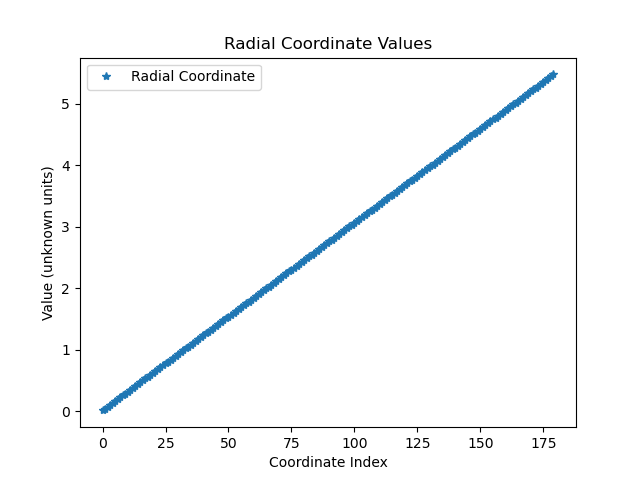

In [67]:
# Add axis labels, a legend, and style the line
plt.plot(data['radial'], linestyle=' ', marker='*', label='Radial Coordinate')
plt.title('Radial Coordinate Values')
plt.xlabel('Coordinate Index')
plt.ylabel('Value (unknown units)')
plt.legend()
plt.show()

In [68]:
plt.close()

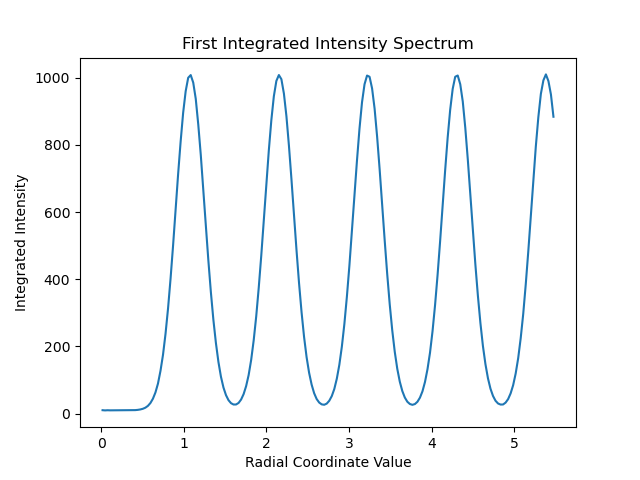

In [69]:
# Plot one of the intensity spectra against the radial coordinate values
plt.plot(data['radial'], data['intensity'][0])
plt.xlabel('Radial Coordinate Value')
plt.ylabel('Integrated Intensity')
plt.title('First Integrated Intensity Spectrum')
plt.show()

In [70]:
plt.close()

## 2D Plots

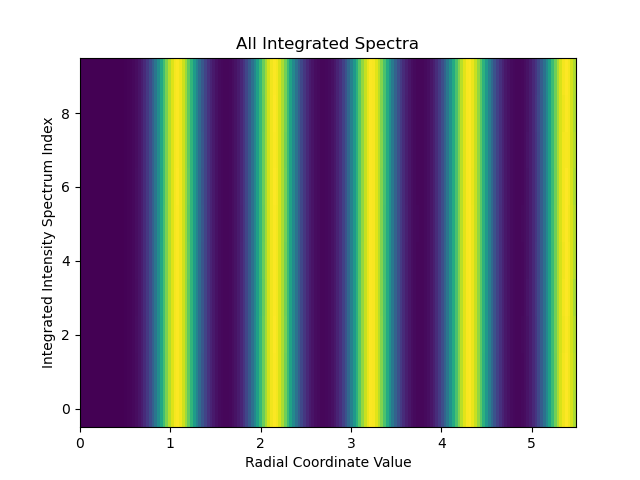

In [71]:
plt.pcolormesh(data['radial'], np.arange(data['intensity'].shape[0]), data['intensity'])
plt.xlabel('Radial Coordinate Value')
plt.ylabel('Integrated Intensity Spectrum Index')
plt.title('All Integrated Spectra')
plt.show()

In [72]:
plt.close()